In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime

In [2]:
train = pd.read_csv('train_users_2.csv', parse_dates=['date_account_created','timestamp_first_active','date_first_booking'])
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
#Check for Missing data
train.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [4]:
#impute age missing values with the median

#We could even take an average based on some other criteria – 
#for example filling the missing age values based on an average age for users that selected the same country_destination.

train['age'].fillna(train['age'].median() , inplace = True)

In [5]:
#impute first_affiliate_tracked missing values with the mode

train['first_affiliate_tracked'].fillna(train['first_affiliate_tracked'].mode()[0] , inplace = True)

In [6]:
#impute the date account was created.
#df_all['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [7]:
#Check for Missing data
train.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [8]:
#Encode Country destination
#train['country_destination'] = labelencoder_X.fit_transform(train['country_destination'])

In [9]:
#drop the date columns and ID
train_without_dates = train.drop(['id','date_account_created','timestamp_first_active','date_first_booking', 'country_destination'], axis=1)

In [10]:
train_without_dates.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [11]:
#Convert to numeric
labelencoder_X  = LabelEncoder()
y = labelencoder_X.fit_transform(train['country_destination']) #train['country_destination']
y.shape

(213451,)

In [12]:
#Apply the get dummies to label encode and one hot encode
X_without_date = pd.get_dummies(train_without_dates, drop_first = True)

In [13]:
X_without_date.shape

(213451, 123)

In [14]:
y.shape

(213451,)

In [15]:
#Spilt Dataset into Train and Test
from sklearn.model_selection import train_test_split

In [16]:

X_train_withoutDate, X_test_withoutDate, y_train, y_test = train_test_split(X_without_date, y, test_size=0.3, random_state=42, stratify = y)

In [17]:
#Scale
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()


X_train_withoutDate = sc_x.fit_transform(X_train_withoutDate)
X_test_withoutDate = sc_x.transform(X_test_withoutDate)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
model = lr.fit(X_train_withoutDate, y_train)

In [21]:
y_pred = model.predict(X_test_withoutDate)

In [23]:
model.score(X_test_withoutDate,y_test)

0.60136485726778688

In [ ]:
lr_df = pd.Dataframe('predicted'=y_pred,'actual'= y_test)
accuracy = sum(lr_df['predicted'] == lr_df['actual'])/len(lr_df.index) # Check accuracy




In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[    0,     0,     0,     0,     0,     0,     0,   106,     0,
            0,    56,     0],
       [    0,     0,     0,     0,     0,     0,     0,   284,     0,
            0,   144,     0],
       [    0,     0,     0,     0,     0,     0,     0,   221,     0,
            0,    97,     0],
       [    0,     0,     0,     0,     0,     0,     0,   471,     0,
            0,   204,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1014,     0,
            0,   493,     0],
       [    0,     0,     0,     0,     0,     0,     0,   479,     0,
            0,   218,     0],
       [    0,     0,     0,     0,     0,     0,     0,   596,     0,
            0,   255,     0],
       [    0,     0,     0,     0,     0,     0,     0, 32783,     0,
            0,  4580,     0],
       [    0,     0,     0,     0,     0,     0,     0,   156,     0,
            0,    73,     0],
       [    0,     0,     0,     0,     0,     0,     0,    46,     0,
            0,    19

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0   106     0     0    56     0]
 [    0     0     0     0     0     0     0   284     0     0   144     0]
 [    0     0     0     0     0     0     0   221     0     0    97     0]
 [    0     0     0     0     0     0     0   471     0     0   204     0]
 [    0     0     0     0     0     0     0  1014     0     0   493     0]
 [    0     0     0     0     0     0     0   479     0     0   218     0]
 [    0     0     0     0     0     0     0   596     0     0   255     0]
 [    0     0     0     0     0     0     0 32783     0     0  4580     0]
 [    0     0     0     0     0     0     0   156     0     0    73     0]
 [    0     0     0     0     0     0     0    46     0     0    19     0]
 [    0     0     0     0     1     0     0 12986     0     0  5726     0]
 [    0     0     0     0     0     0     0  2175     0     0   853     0]]
Normalized confusion matrix
[[  0.00e+00   0.00e+00   0.00e

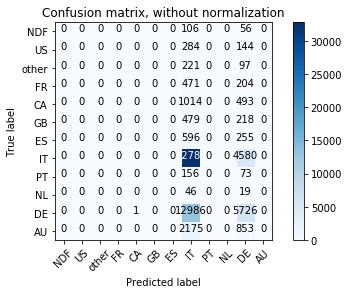

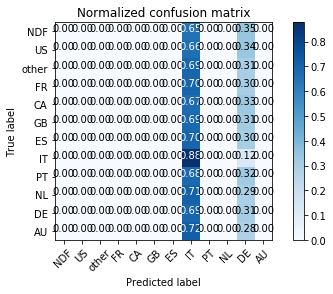

In [25]:
#Plot the Confusion Matrix
import itertools
class_names = train['country_destination'].unique()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
#plt.show()

In [29]:
from sklearn import svm

In [ ]:
#Using Support Vector Machines
classifier = svm.SVC(kernel='linear', random_state = 0)
model_svm = classifier.fit(X_train_withoutDate, y_train)


In [ ]:
y_pred_svm = model_svm.predict(X_test_withoutDate)

In [ ]:
model_svm.score(X_test_withoutDate,y_test)

In [ ]:
svm_df = pd.Dataframe('predicted'=y_pred_svm,'actual'= y_test)
accuracy = sum(svm_df['predicted'] == svm_df['actual'])/len(svm_df.index) # Check accuracy


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
#Using Random Form

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Train the model 
rfc.fit(X_train_withoutDate,y_train)
y_pred_rfc = rfc.predict(X_test_withoutDate)


# Get the feature importances
# Implement me
importances = rfc.feature_importances_

In [ ]:
rfc.score(X_test_withoutDate,y_test)

In [ ]:
rfc_df = pd.Dataframe('predicted'=y_pred_rfc,'actual'= y_test)
accuracy = sum(rfc_df['predicted'] == rfc_df['actual'])/len(rfc_df.index) # Check accuracy



In [ ]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_without_date.columns[:-1])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

In [ ]:
# Make the bar Plot from f_importances 
plt.figure(figsize=(8,5))
f_importances.plot(kind='bar', fontsize=9, rot=45)
plt.xlabel('Features', fontsize=9)
plt.ylabel('Importance', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print(model.feature_importances_)

### - Convert the Catergorical Variables to Numeric (One Hot Encode)

In [ ]:
#Convert to numeric
labelencoder_X  = LabelEncoder()

train['gender'] = labelencoder_X.fit_transform(train['gender'])

In [ ]:
#Encode Sign up method
train['signup_method'] = labelencoder_X.fit_transform(train['signup_method'])

In [ ]:
#Encode language
train['language'] = labelencoder_X.fit_transform(train['language'])

In [ ]:
#Encode affiliate channel
train['affiliate_channel'] = labelencoder_X.fit_transform(train['affiliate_channel'])

In [ ]:
#Encode affiliate_provider
train['affiliate_provider'] = labelencoder_X.fit_transform(train['affiliate_provider'])

In [ ]:
#Encode first_affiliate_tracked
train['first_affiliate_tracked'] = labelencoder_X.fit_transform(train['first_affiliate_tracked'])

In [ ]:
#Encode signup_app
train['signup_app'] = labelencoder_X.fit_transform(train['signup_app'])

In [ ]:
#Encode first_device_type
train['first_device_type'] = labelencoder_X.fit_transform(train['first_device_type'])

In [ ]:
#Encode first_browser
train['first_browser'] = labelencoder_X.fit_transform(train['first_browser'])

In [ ]:
#Encode Country destination
train['country_destination'] = labelencoder_X.fit_transform(train['country_destination'])

In [ ]:
train.head()

In [ ]:
#drop the id column
train.drop(['id'], axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
#drop the date columns
train_without_dates = train.drop(['date_account_created','timestamp_first_active','date_first_booking'], axis=1)

In [ ]:
train_without_dates.head()

In [ ]:
#Assign the Independent variable to X 
X_without_date = train_without_dates.drop(['country_destination'], axis=1)
X_without_date.head()

In [ ]:
y = train_without_dates['country_destination']
y.head()

In [ ]:
#Get the values to apply one hot encode

In [ ]:
#Scale the age to 0 - 1

In [ ]:
pd.get_dummies(pd.DataFrame(list('abcaa'),list('abcaa')), drop_first=True)

In [ ]:
e= pd.DataFrame([['w','e','r','e'],['b','e','t','t'],['r','e','t','e'],['t','r','a','q']])

In [ ]:
e.columns=['a','b','c','d']

In [ ]:
e

In [ ]:
pd.get_dummies(e['a'], drop_first = True)